# MP3

In [ ]:
#import pandas and read the csv file as a variable
import pandas as pd
df = pd.read_csv("reddit_metadata.csv")

<ipython-input-4-e42991073113>:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_metadata.csv")


In [ ]:
#print shape of df
df.shape

(45051, 10)

In [ ]:
#use head function to inspect some of the data
df.head()

,ID,hasImage,user_name_len,title_len,num_comments,subreddit,upvote_ratio,score,upvote_ratio.1,2_way_label
0,0,True,11.0,92.0,2.0,mildlyinteresting,0.84,12,0.84,1
1,1,True,9.0,NaN,NaN,psbattle_artwork,NaN,5,NaN,0
2,2,True,8.0,35.0,2.0,pareidolia,0.99,119,0.99,0
3,3,True,14.0,45.0,1.0,neutralnews,0.92,44,0.92,1
4,4,True,NaN,NaN,NaN,psbattle_artwork,NaN,3,NaN,0


In [ ]:
#Use info function to inspect data types and value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878218 entries, 0 to 878217
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              878218 non-null  int64  
 1   hasImage        878218 non-null  bool   
 2   user_name_len   729472 non-null  float64
 3   title_len       804378 non-null  float64
 4   num_comments    636118 non-null  float64
 5   subreddit       878218 non-null  object 
 6   upvote_ratio    636118 non-null  float64
 7   score           878218 non-null  int64  
 8   upvote_ratio.1  636118 non-null  float64
 9   2_way_label     878218 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 61.1+ MB


In [ ]:
#create new variable for clean dataframe
df_clean = df

In [ ]:
#convert subreddit string to int
df_clean["subreddit_int"] = df_clean.subreddit.astype('category').cat.codes

In [ ]:
#list unique cat codes
df_clean["subreddit_int"].unique()

array([ 4, 12,  8,  6,  9,  1,  7,  3, 11, 18, 15, 13, 14,  5, 10, 17, 16,
       19,  0, 20,  2, 21], dtype=int8)

The subreddit categories range from 0 to 21

In [ ]:
#Create new column to store numeric image info. Replace boolean with int value of 1 if true or 0 if false.

df_clean["hasImage_int"]= df_clean["hasImage"].astype(int)

In [ ]:
#check data types
df_clean.dtypes

ID                  int64
hasImage             bool
user_name_len     float64
title_len         float64
num_comments      float64
subreddit          object
upvote_ratio      float64
score               int64
upvote_ratio.1    float64
2_way_label         int64
subreddit_int        int8
hasImage_int        int32
dtype: object

In [ ]:
#check missing values
df_clean.isna().sum()

ID                     0
hasImage               0
user_name_len     148746
title_len          73840
num_comments      242100
subreddit              0
upvote_ratio      242100
score                  0
upvote_ratio.1    242100
2_way_label            0
subreddit_int          0
hasImage_int           0
dtype: int64

In [ ]:
#replace missing values with the avg of each column
df_clean["user_name_len"]=df_clean["user_name_len"].fillna(df_clean["user_name_len"].mean())
df_clean["title_len"]=df_clean["title_len"].fillna(df_clean["title_len"].mean())
df_clean["num_comments"]=df_clean["num_comments"].fillna(df_clean["num_comments"].mean())
df_clean["upvote_ratio"]=df_clean["upvote_ratio"].fillna(df_clean["upvote_ratio"].mean())
df_clean["upvote_ratio.1"]=df_clean["upvote_ratio.1"].fillna(df_clean["upvote_ratio.1"].mean())
df_clean["score"]=df_clean["score"].fillna(df_clean["score"].mean())



Discussion: Replacing them with the mean seemed more appropriate than dropping them, given the large number of missing values (over 200,000) in some columns.

In [ ]:
#check missing values
df_clean.isna().sum()

ID                0
hasImage          0
user_name_len     0
title_len         0
num_comments      0
subreddit         0
upvote_ratio      0
score             0
upvote_ratio.1    0
2_way_label       0
subreddit_int     0
hasImage_int      0
dtype: int64

In [ ]:
#describe dataframe to see descriptive stats and see possible outliers
df_clean.describe()

,ID,user_name_len,title_len,num_comments,upvote_ratio,score,upvote_ratio.1,2_way_label,subreddit_int,hasImage_int
count,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000
mean,439108.500000,11.277863,50.196185,17.887040,0.853566,312.269706,0.853566,0.455961,8.925496,0.727725
std,253519.843692,3.308823,34.098731,105.596006,0.099406,2621.030757,0.099406,0.498057,4.497380,0.445131
min,0.000000,3.000000,1.000000,0.000000,0.500000,-950.000000,0.500000,0.000000,0.000000,0.000000
25%,219554.250000,9.000000,27.000000,1.000000,0.810000,3.000000,0.810000,0.000000,5.000000,0.000000
50%,439108.500000,11.277863,48.000000,5.000000,0.853566,10.000000,0.853566,0.000000,9.000000,1.000000
75%,658662.750000,14.000000,64.000000,17.887040,0.920000,34.000000,0.920000,1.000000,12.000000,1.000000
max,878217.000000,20.000000,2904.000000,10783.000000,1.000000,137179.000000,1.000000,1.000000,21.000000,1.000000


Discussion: While the max values for user_name_len, title_len, score, and num_comments are very large and the min value for score is very low, given the nature of the problem, since we are trying to predict whether a post is fake or not, extreme values in these categories might be useful for signaling that something is odd about the post. Also I am not familiar with reddit but a quick google search seemed to indicate that these numbers are not impossible to achieve. For these reasons I will not be dropping them.

In [ ]:
# new variable for df including only numeric coluumns
df_num = df_clean.select_dtypes(include="number")

In [ ]:
#examine new numeric df
df_num.head()

,ID,user_name_len,title_len,num_comments,upvote_ratio,score,upvote_ratio.1,2_way_label,subreddit_int,hasImage_int
0,0,11.000000,92.000000,2.00000,0.840000,12,0.840000,1,4,1
1,1,9.000000,50.196185,17.88704,0.853566,5,0.853566,0,12,1
2,2,8.000000,35.000000,2.00000,0.990000,119,0.990000,0,8,1
3,3,14.000000,45.000000,1.00000,0.920000,44,0.920000,1,6,1
4,4,11.277863,50.196185,17.88704,0.853566,3,0.853566,0,12,1


<Axes: xlabel='2_way_label'>

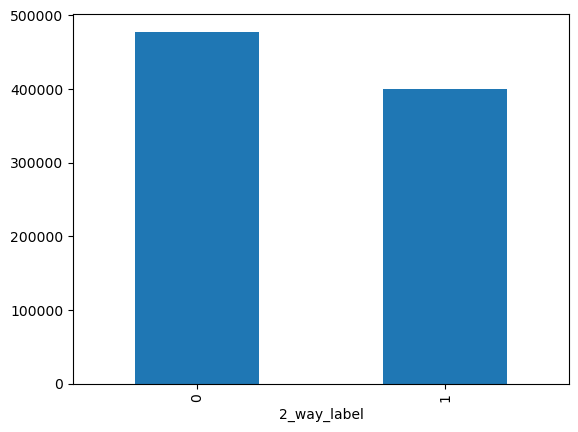

In [ ]:
#bar graph for 2_way_label to see the counts in each category of the target column
df_num["2_way_label"].value_counts().plot(kind="bar")

Discussion: There are slightly more posts with the label 0, than the label 1

<Axes: >

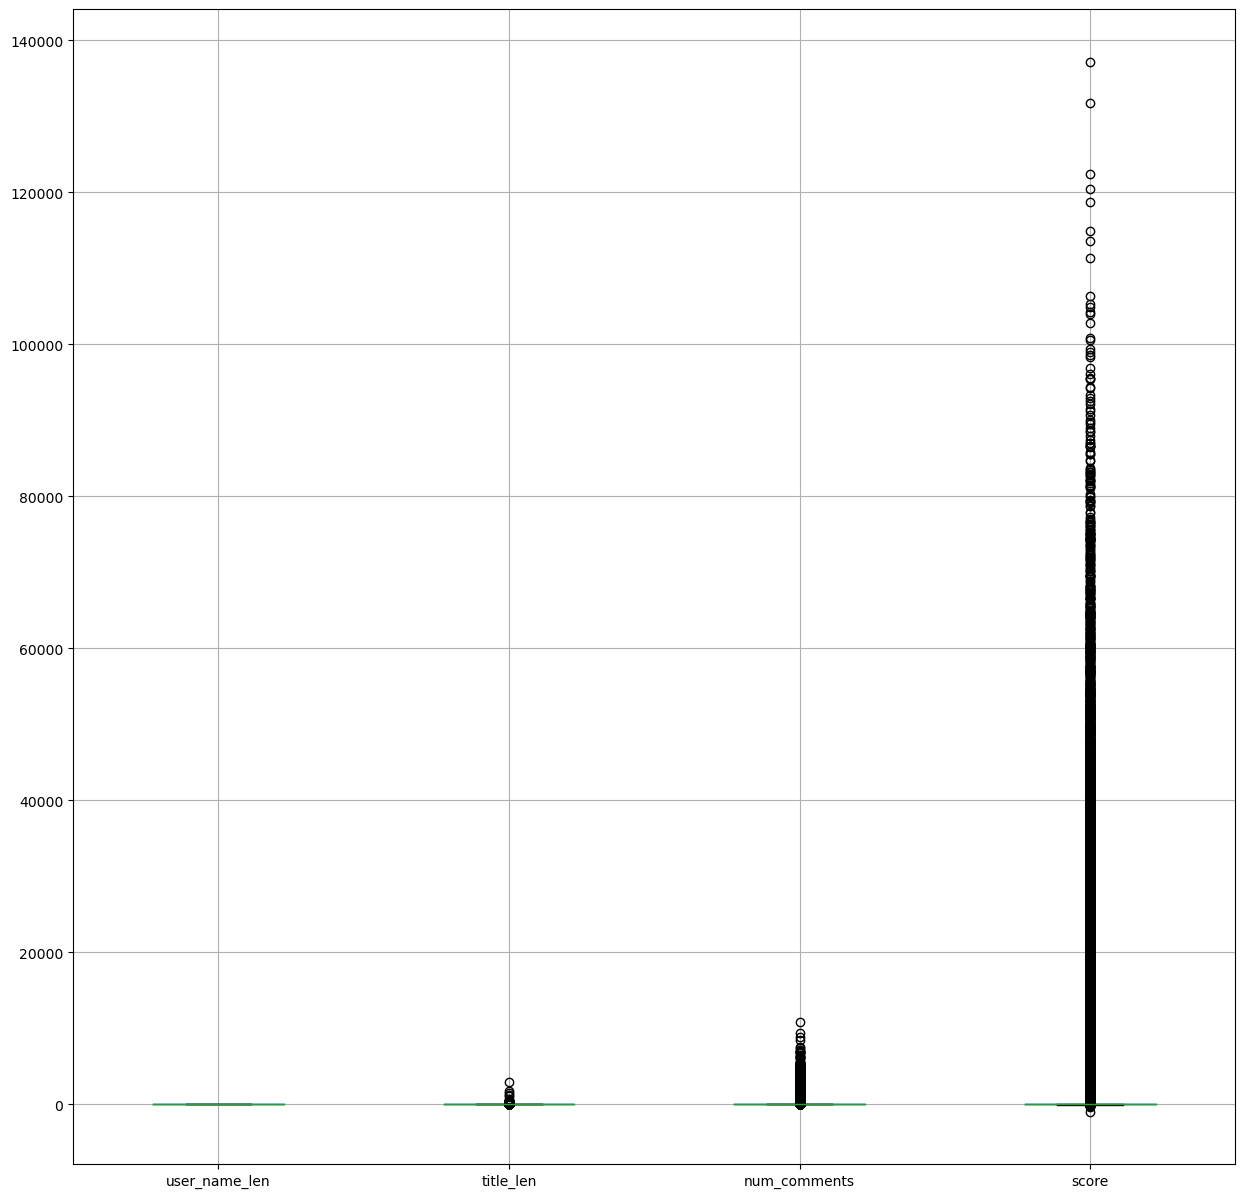

In [ ]:
#box plot to viusalize distribution of non-id columns that have large ranges of responses (user_name_len, title_len, num_comments, socre)
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
df_num[["user_name_len","title_len","num_comments", "score"]].boxplot()

Discussion: Most records have values below 1,000 in all of these categories, but a there a quite a few that exceed the upper quartile, in all columns except user_name_len.

<Axes: >

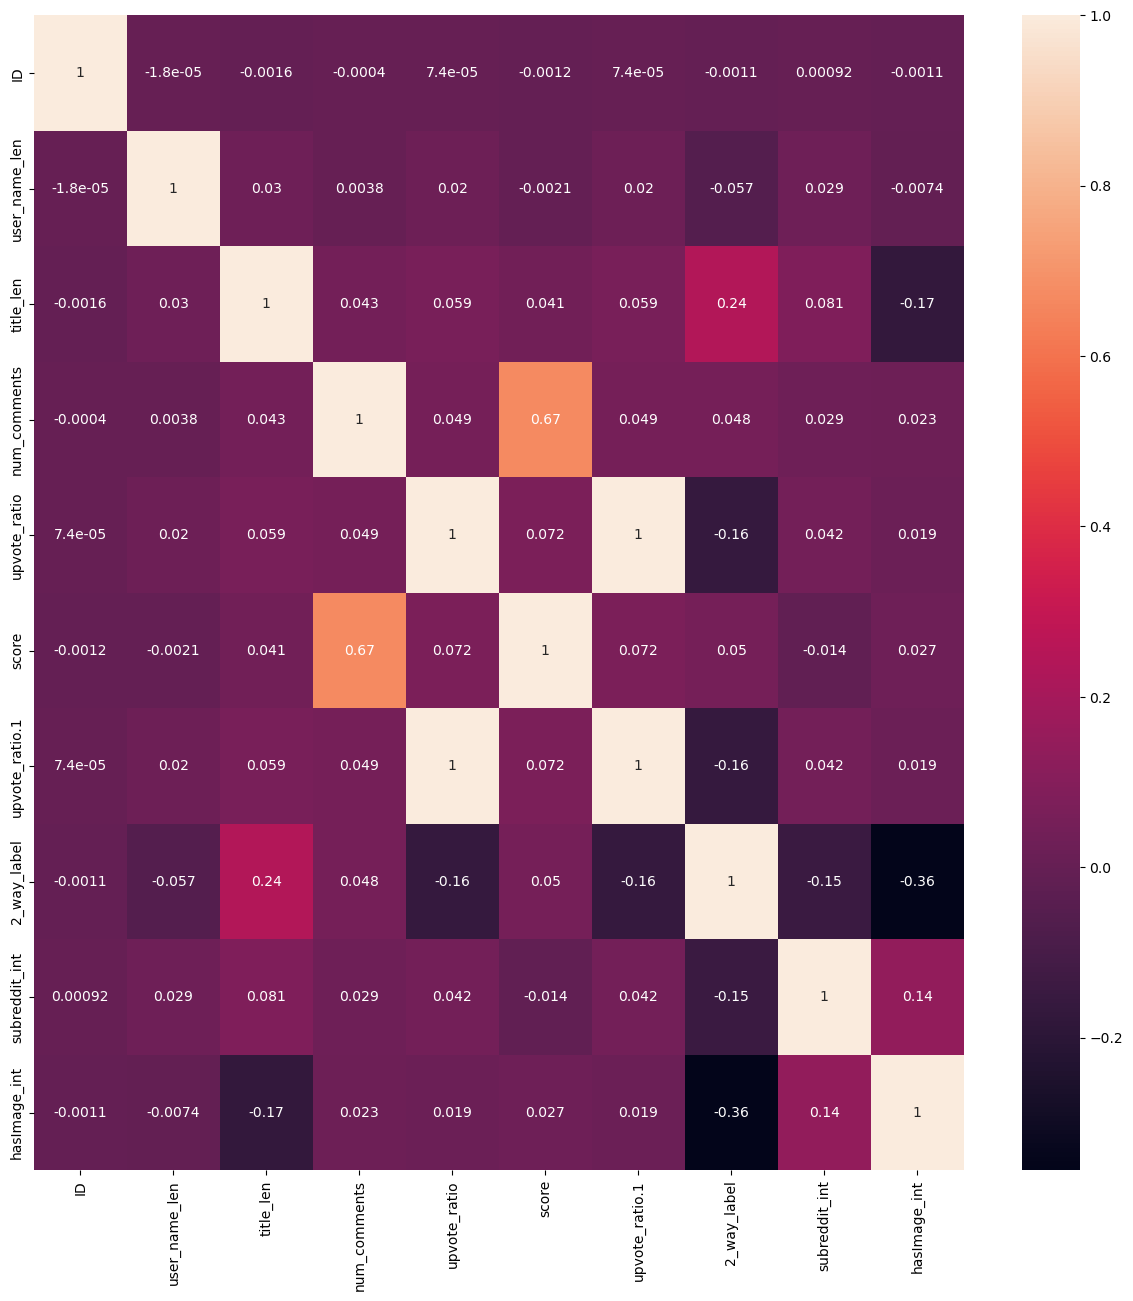

In [ ]:
#get correlation heatmap
dfn_correlation = df_num.corr()
plt.figure(figsize=(15,15))
import seaborn as sns
sns.heatmap(dfn_correlation, annot=True)

Discussion: upvote_ratio and upvote_ratio_1 have a perfect correlation meaning the two columns are probably exactly the same. The second strongest correlation is between the score and the number of comments. The strongest correlation with  the target attribute (2_way_label) is hasImage_int (-0.36), followed by title_len (0.24) these correlations are not very strong.

<Axes: xlabel='hasImage_int', ylabel='2_way_label'>

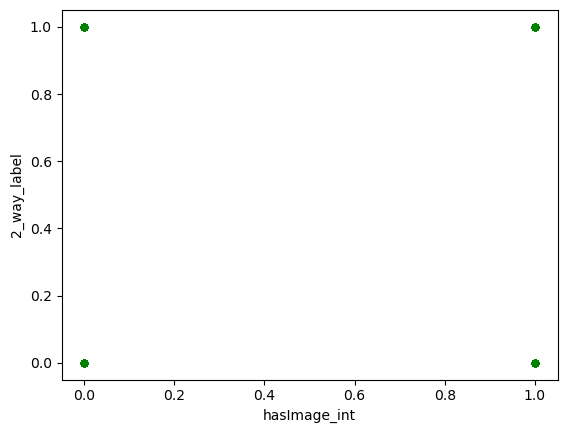

In [ ]:
#scatter plot mapping the relation between hasImage_int and 2_way_label

df_num.plot.scatter(x="hasImage_int", y="2_way_label", c="green")

Discussion: The correlation between the target attribute (2_way_label) and it's most strongly correlated feature (hasImage_int) is not linear, though that is to be expected given that both of those columns only allow for two types of responses.

In [ ]:
#splitting dataframe into 80/20 split to create training and testing dataframes
#inspecting shape of the 2 new dfs to confirm split
from sklearn.model_selection import train_test_split
training_df, testing_df = train_test_split(df, test_size=0.2)

training_df.shape, testing_df.shape

((702574, 12), (175644, 12))

Discussion: The new training_df has a larger amount of records than the testing_df, so the split appears to have been executed correctly

In [ ]:
#create new training_features dataframe using only one feature

training_features = training_df[["hasImage_int"]]

#create new training_target variable

training_target = training_df["2_way_label"]

#inspect shape of new dataframes

training_features.shape, training_target.shape

((702574, 1), (702574,))

Discussion: the training features and target dataframes have the same number of records as the training_df but only one column, so the code appears to have executed correctly.

In [ ]:
#create new testing_features dataframe using only one feature

testing_features = testing_df[["hasImage_int"]]

#create new testing_target variable

testing_target = testing_df["2_way_label"]

#inspect shape of new dataframes

testing_features.shape, testing_target.shape

((175644, 1), (175644,))

Discussion: the testing features and target dataframes have the same number of records as the testing_df but only one column, so the code appears to have executed correctly.

In [ ]:
#import LogisticRegression model and assign it to model variable
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, solver="liblinear")

In [ ]:
#fit model on trainig_features and training_target
model.fit(training_features, training_target)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
#import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
#calculate accuracy_score for training set
prediction = model.predict(training_features)
accuracy_score(training_target, prediction)

0.677806181270585

Discussion: The model is approximately 68% accurate on the training set

In [ ]:
#calculate accuracy_score for testing set
prediction = model.predict(testing_features)
accuracy_score(testing_target, prediction)


0.6773986017171096

Discussion: The model is also approximately 68% accurate on the testing set but the accuracy is slightly higher on the training set than on the testing set.

In [ ]:
#create new training_features dataframe using 6 features

training_features = training_df[["hasImage_int", "title_len", "subreddit_int", "upvote_ratio", "user_name_len", "score"]]

#create new training_target variable

training_target = training_df["2_way_label"]

#inspect shape of new dataframes

training_features.shape, training_target.shape

((702574, 6), (702574,))

Discussion: the training features and target dfs have the same number of records as the training_df but only 6 columns for the features and one for the target, so the code appears to have executed correctly.

In [ ]:
#create new testing_features dataframe using 6 features

testing_features = testing_df[["hasImage_int", "title_len", "subreddit_int", "upvote_ratio", "user_name_len", "score"]]

#create new testing_target variable

testing_target = testing_df["2_way_label"]

#inspect shape of new dataframes

testing_features.shape, testing_target.shape

((175644, 6), (175644,))

Discussion: the testing features and target dfs have the same number of records as the testing_df but only 6 columns for the features and one for the target, so the code appears to have executed correctly.

In [ ]:
#fit model on trainig_features and training_target
model.fit(training_features, training_target)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
#calculate accuracy_score for training set
prediction = model.predict(training_features)
accuracy_score(training_target, prediction)

0.7079353918590782

Discussion: The model is approximately 71% accurate on the training set

In [ ]:
#calculate accuracy_score for testing set
prediction = model.predict(testing_features)
accuracy_score(testing_target, prediction)

0.707578966545968

Discussion: The model is also approximately 71% accurate on the testing set, but the accuracy is slightly higher on the training set than on the testing set.

Discussion: The model is slightly more accurate when using six features (accuracy score: 0.71) than when using one feature (accuracy score: 0.68). This makes sense as the six features offer more points of comparison between the real and fake posts. I was also prompted to increase the max iterations and use a solver when fitting the model to six features, which did not happen when I only used one feature. Increasing the max iterations and using the solver improved the model when using 6 features but did not change the accuracy of the model using one feature.